# CLASSIFICATION ANALYSIS


The goal of classification analysis is to predict the category or class to which a new observation belongs, based on a set of input variables.

Given a set of observed data points $X = {x_0, x_1, ..., x_n}$ with corresponding class labels $Y = { y_0, y_1, ..., y_n}$, the objective is to find a function $y = f(x, \theta)$ that maps input variables $x$ to class labels $y$, where $\theta$ are the parameters of the model to be determined.

## MNIST Digits Dataset

The [MNIST](https://yann.lecun.com/exdb/mnist/) dataset consists of black-and-white images of handwritten digits, each normalized to fit within a 28x28 pixel bounding box.

The images are anti-aliased, introducing grayscale levels for smoother edges.
The dataset includes **60,000 training images and 10,000 testing images**, making it a widely used benchmark for image classification tasks.  

![MNIST  Digits](imgs/mnist_ordered_digits.png)


### Loading the MNIST dataset

In [3]:
import gzip
import os
import numpy as np
import struct


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        _, _ = struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        _, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(num, rows*cols)

    return images, labels

In [4]:
# Load the dataset
mnist_path = '../supplemental_material/MNIST'
X_train, y_train = load_mnist(mnist_path, kind='train')
X_test, y_test = load_mnist(mnist_path, kind='t10k')

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training set shape: (60000, 784), Training labels shape: (60000,)
Test set shape: (10000, 784), Test labels shape: (10000,)


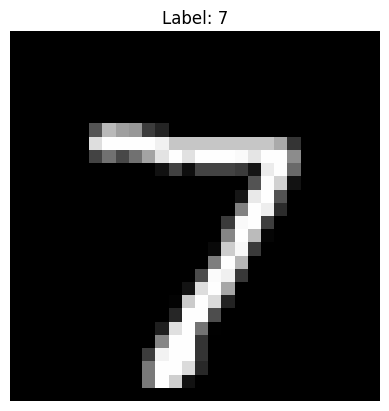

In [10]:
import matplotlib.pyplot as plt

# Plot a test image
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_test[0]}")
plt.axis('off')
plt.show()

`Goal: Use logistic regression model to classify images of handwritten digits pairs (0 vs 1, 3 vs 4 , etc..) from the MNIST dataset into their correct labels.`

### Filter the dataset

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Filter the data to include only two classes 
digits = [5, 8]
train_filter = np.isin(y_train, digits)
test_filter = np.isin(y_test, digits)

X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]

X_test_filtered = X_test[test_filter]
y_test_filtered = y_test[test_filter]
print(f"Filtered training set shape: {X_train_filtered.shape}, Filtered training labels shape: {y_train_filtered.shape}")

unique_classes, class_counts = np.unique(y_train_filtered, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"Number of images for class {cls}: {count}")

Filtered training set shape: (11272, 784), Filtered training labels shape: (11272,)
Number of images for class 5: 5421
Number of images for class 8: 5851


### Train a logistic regression model

In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_filtered, y_train_filtered)

# Predict on the test set and evaluate
y_pred = log_reg.predict(X_test_filtered)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Test set accuracy ({digits[0]} vs {digits[1]}): {accuracy:.4f}")

Test set accuracy (5 vs 8): 0.9502


c:\Users\rodani\OneDrive - Area Science Park\Documenti\GitHub\Introduction-Statistical-Data-Analysis-Machine-Learning\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


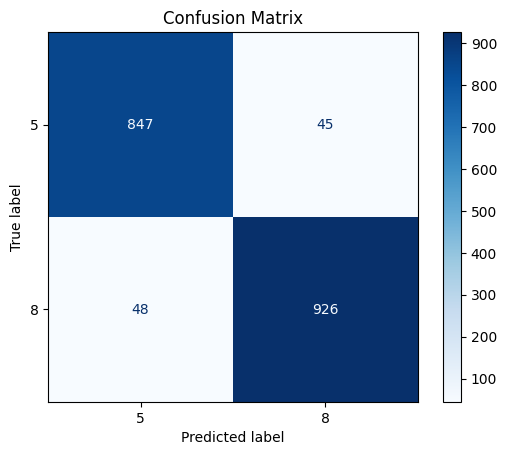

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, display_labels=[0, 1]):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix")
    plt.show()

# Call the function to plot confusion matrix
plot_confusion_matrix(y_test_filtered, y_pred, digits)

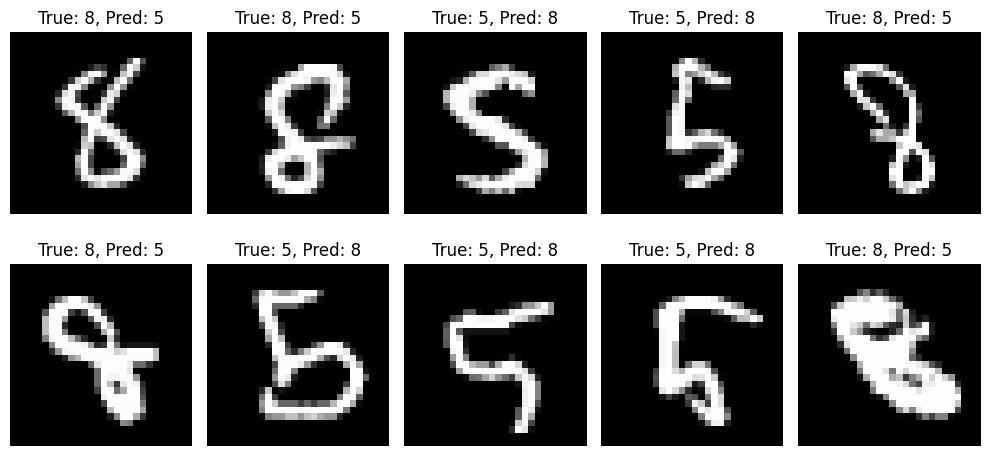

In [8]:
# Function to display mislabeled images
def show_mislabeled_images(X_test, y_true, y_pred):
    # Get the indices of mislabeled images
    mislabeled_indices = np.where(y_true != y_pred)[0]

    # Display a few mislabeled images
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(mislabeled_indices[:10]):  # Show first 10 mislabeled images
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[index]}, Pred: {y_pred[index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to show mislabeled images
show_mislabeled_images(X_test_filtered, y_test_filtered, y_pred)

## Multiclass logistic regression on MNIST digits

`Goal: Use softmax regression model to classify images of handwritten digits from the MNIST dataset into their correct labels.`

In multiclass logistic regression, we extend the binary case to handle multiple classes. We use learned weights \( W \) and bias \( b \) to compute the output \( Z \) for each class. The softmax function is then applied to obtain the probabilities for each class:

$$
P(y = k | \mathbf{x}) = \frac{e^{Z_k}}{\sum_{j=1}^{K} e^{Z_j}}
$$

where $Z_k$ is the output for class $k$, $K$ is the total number of classes, and $\mathbf{x}$ is the input feature vector. 


The predicted class label is determined by:

$$
\text{predictions} = \text{argmax}(P(y = k | \mathbf{x}))
$$

where $\text{argmax}$ selects the class with the highest probability.

In [9]:
sklearn_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
sklearn_model.fit(X_train[:10000,:], y_train[:10000])  

# Make predictions on the test set
y_pred_test_sklearn = sklearn_model.predict(X_test[:2000,:])

# Evaluate the model
test_accuracy_sklearn = accuracy_score(y_test[:2000], y_pred_test_sklearn)
print(f"Test accuracy: {test_accuracy_sklearn * 100:.2f}%")

Test accuracy: 83.30%


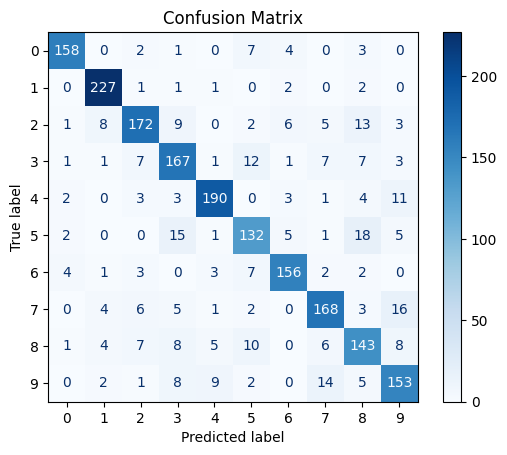

In [16]:
plot_confusion_matrix(y_test[:2000], y_pred_test_sklearn, [i for i in range(10)])

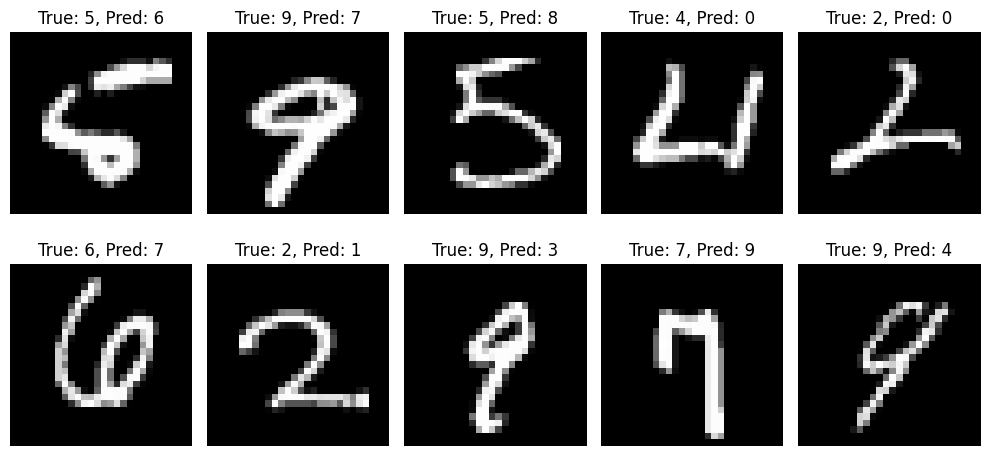

In [17]:
show_mislabeled_images(X_test[:2000], y_test[:2000], y_pred_test_sklearn)